## Logistic Regression Animation — Gradient Descent Learning

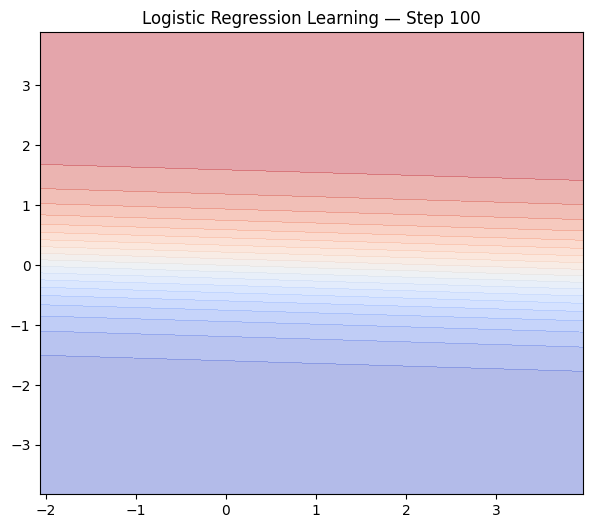

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification

# Create folder for GIFs
os.makedirs("gifs", exist_ok=True)

# Generate a 2D binary classification dataset
X, y = make_classification(
    n_samples=300, n_features=2,
    n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Add bias term
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent
weights = np.zeros(X_bias.shape[1])
lr = 0.1
iterations = 100
weight_history = []

for _ in range(iterations):
    z = X_bias @ weights
    predictions = sigmoid(z)
    gradient = X_bias.T @ (predictions - y) / len(y)
    weights -= lr * gradient
    weight_history.append(weights.copy())

# Decision boundary grid
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30)

def update(i):
    # Remove ALL old contour layers safely
    while ax.collections:
        ax.collections[-1].remove()

    w = weight_history[i]

    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ w).reshape(xx.shape)

    ax.contourf(xx, yy, probs, levels=20, alpha=0.4, cmap="coolwarm")

    ax.set_title(f"Logistic Regression Learning — Step {i+1}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

ani = FuncAnimation(fig, update, frames=len(weight_history), interval=120)

ani.save("gifs/logistic_regression.gif", writer="pillow")

plt.show()
